In [1]:
#%pylab
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

In [2]:
Nt = 1000
Nx = 10
x = np.linspace(0.,2.,Nx)
t = np.linspace(0.,1000.,Nt)

deltat = t[1] - t[0]
deltax = x[1] - x[0]

k = 0.075

lambda_ = (k*deltat)/deltax
print(lambda_,deltat)

0.3378378378378379 1.001001001001001


In [3]:
def h1(t):
    return 100.
def h2(t):
    return 50.

In [15]:
T = np.zeros((Nt,Nx))

#T[:,0] = 20.
#T[:,-1] = 20.

#T[0,1:5] = h1(t[0]) 
#T[0,6:9] = h2(t[0]) 

T[:,0] = h1(t[0]) 
T[:,-1] = h2(t[0]) 

In [16]:
print(T)

[[100.   0.   0. ...   0.   0.  50.]
 [100.   0.   0. ...   0.   0.  50.]
 [100.   0.   0. ...   0.   0.  50.]
 ...
 [100.   0.   0. ...   0.   0.  50.]
 [100.   0.   0. ...   0.   0.  50.]
 [100.   0.   0. ...   0.   0.  50.]]


In [17]:
for l in range(1,len(t)):
    
   # T[l,-1] = 50*np.sin(5*t[l])
    
    for i in range(1, len(x)-1):
        T[l,i] = T[l-1,i] + lambda_*(T[l-1,i+1] - 2.*T[l-1,i] + T[l-1,i-1])

In [18]:
for i in range(len(t)):
    if i%10 == 0:
        plt.plot(x,T[i,:], label=r'$T(x,%.2f)$' %(t[i]))

<IPython.core.display.Javascript object>


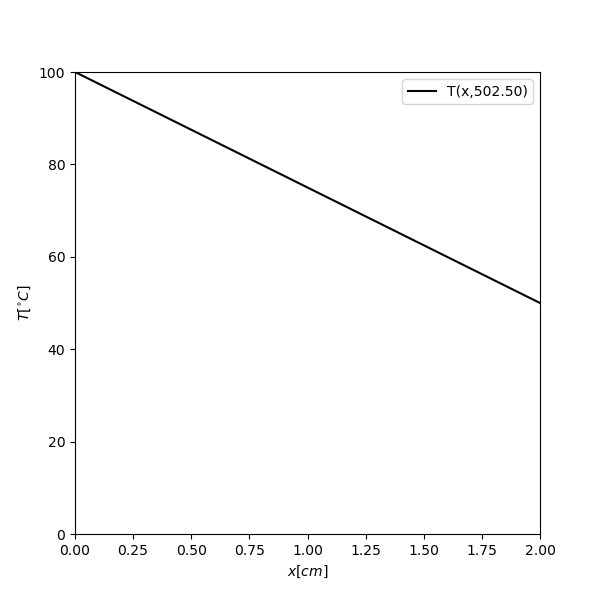

In [19]:
# Zona de animacion

Nframes = len(t)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,100)
    
    ax.set_xlabel(r'$x[cm]$')
    ax.set_ylabel(r'$T[^{\circ}C]$')
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x, T[i,:], color='k', label=r'T(x,%.2f)' %(t[i]))
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)

In [21]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800 )
#Animation.save( 'Heat1D.mp4', writer=writer )